<a href="https://colab.research.google.com/github/kingy260/Project_2/blob/main/Project2_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#AER850 Project 2 STEP 5
#Shayaan Shaikh

from google.colab import drive
drive.mount("/content/drive")

import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras import ops
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

Mounted at /content/drive


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


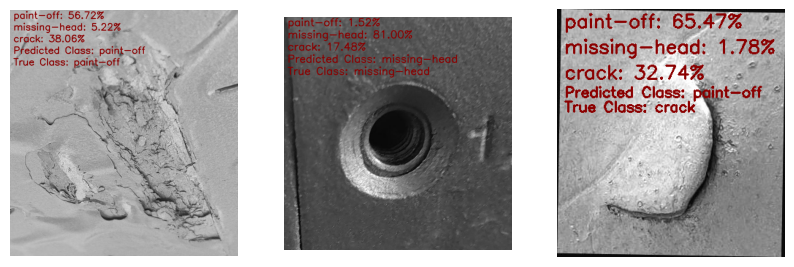

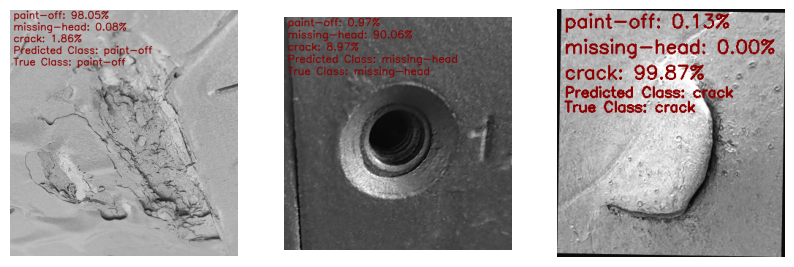

In [28]:
# load the models
model_tuned = keras.models.load_model('/content/drive/My Drive/AER850/Project2/Project_2/model_tuned.keras')
model_overfit = keras.models.load_model('/content/drive/My Drive/AER850/Project2/Project_2/model_overfit.keras')

# load and scale test images

img1path ="/content/drive/My Drive/AER850/Project2/Project_2/Project2Data/Data/test/paint-off/test_paintoff.jpg"
img2path="/content/drive/My Drive/AER850/Project2/Project_2/Project2Data/Data/test/missing-head/test_missinghead.jpg"
img3path="/content/drive/My Drive/AER850/Project2/Project_2/Project2Data/Data/test/crack/test_crack.jpg"

img1 = image.load_img(img1path, target_size=(100, 100), color_mode="grayscale")  # Change target_size according to your model input
img2 = image.load_img(img2path, target_size=(100, 100), color_mode="grayscale")  # Change target_size according to your model input
img3 = image.load_img(img3path, target_size=(100, 100), color_mode="grayscale")  # Change target_size according to your model input

# convert to numpy array
img1_array = image.img_to_array(img1)
img2_array = image.img_to_array(img2)
img3_array = image.img_to_array(img3)

# rescale images
img1_array = img1_array / 255.0
img2_array = img2_array / 255.0
img3_array = img3_array / 255.0

# add batch dimension
img1_array = np.expand_dims(img1_array, axis=0)  # Shape becomes (1, 150, 150, 1)
img2_array = np.expand_dims(img2_array, axis=0)  # Shape becomes (1, 150, 150, 1)
img3_array = np.expand_dims(img3_array, axis=0)  # Shape becomes (1, 150, 150, 1)

# test the 3 images
probabilities11= model_overfit.predict(img1_array)
probabilities12= model_overfit.predict(img2_array)
probabilities13= model_overfit.predict(img3_array)

probabilities21= model_tuned.predict(img1_array)
probabilities22= model_tuned.predict(img2_array)
probabilities23= model_tuned.predict(img3_array)

label1='paint-off'
label2='missing-head'
label3='crack'

img1 = cv2.imread("/content/drive/My Drive/AER850/Project2/Project_2/Project2Data/Data/test/paint-off/test_paintoff.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("/content/drive/My Drive/AER850/Project2/Project_2/Project2Data/Data/test/missing-head/test_missinghead.jpg", cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread("/content/drive/My Drive/AER850/Project2/Project_2/Project2Data/Data/test/crack/test_crack.jpg", cv2.IMREAD_GRAYSCALE)
img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
img3 = cv2.cvtColor(img3, cv2.COLOR_GRAY2BGR)

# overfit model
# display probabilities
cv2.putText(img1, f'{label1}: {probabilities11[0][2]*100:.2f}%', (10,25), cv2.FONT_HERSHEY_SIMPLEX, 0.95, (139, 0, 0), 2)
cv2.putText(img1, f'{label2}: {probabilities11[0][1]*100:.2f}%', (10,60), cv2.FONT_HERSHEY_SIMPLEX, 0.95, (139, 0, 0), 2)
cv2.putText(img1, f'{label3}: {probabilities11[0][0]*100:.2f}%', (10,95), cv2.FONT_HERSHEY_SIMPLEX, 0.95, (139, 0, 0), 2)
cv2.putText(img1, f'{"Predicted Class: paint-off"}', (10,130), cv2.FONT_HERSHEY_SIMPLEX, 0.95, (139, 0, 0), 2)
cv2.putText(img1, f'{"True Class: paint-off"}', (10,165), cv2.FONT_HERSHEY_SIMPLEX, 0.95, (139, 0, 0), 2)


# display probabilities
cv2.putText(img2, f'{label1}: {probabilities12[0][2]*100:.2f}%', (10,25), cv2.FONT_HERSHEY_SIMPLEX, 1, (139, 0, 0), 2)
cv2.putText(img2, f'{label2}: {probabilities12[0][1]*100:.2f}%', (10,60), cv2.FONT_HERSHEY_SIMPLEX, 1, (139, 0, 0), 2)
cv2.putText(img2, f'{label3}: {probabilities12[0][0]*100:.2f}%', (10,95), cv2.FONT_HERSHEY_SIMPLEX, 1, (139, 0, 0), 2)
cv2.putText(img2, f'{"Predicted Class: missing-head"}', (10,130), cv2.FONT_HERSHEY_SIMPLEX, 1, (139, 0, 0), 2)
cv2.putText(img2, f'{"True Class: missing-head"}', (10,165), cv2.FONT_HERSHEY_SIMPLEX, 1, (139, 0, 0), 2)

# display probabilities
cv2.putText(img3, f'{label1}: {probabilities13[0][2]*100:.2f}%', (10,25), cv2.FONT_HERSHEY_SIMPLEX, 0.85, (139, 0, 0), 2)
cv2.putText(img3, f'{label2}: {probabilities13[0][1]*100:.2f}%', (10,60), cv2.FONT_HERSHEY_SIMPLEX, 0.85, (139, 0, 0), 2)
cv2.putText(img3, f'{label3}: {probabilities13[0][0]*100:.2f}%', (10,95), cv2.FONT_HERSHEY_SIMPLEX, 0.85, (139, 0, 0), 2)
cv2.putText(img3, f'{"Predicted Class: paint-off"}', (10,120), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (139, 0, 0), 2)
cv2.putText(img3, f'{"True Class: crack"}', (10,140), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (139, 0, 0), 2)

# subplots
plt.figure(figsize=(10, 5))

#  image 1
plt.subplot(1, 3, 1)  # (rows, columns, index)
plt.imshow(img1,cmap='gray')
plt.axis('off')  # Turn off axis

# image 2
plt.subplot(1, 3, 2)
plt.imshow(img2,cmap='gray')
plt.axis('off')

# image 3
plt.subplot(1, 3, 3)
plt.imshow(img3,cmap='gray')
plt.axis('off')

plt.axis('off')  # Turn off axis
plt.show()

#tuned model
#reset images
img1 = cv2.imread("/content/drive/My Drive/AER850/Project2/Project_2/Project2Data/Data/test/paint-off/test_paintoff.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("/content/drive/My Drive/AER850/Project2/Project_2/Project2Data/Data/test/missing-head/test_missinghead.jpg", cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread("/content/drive/My Drive/AER850/Project2/Project_2/Project2Data/Data/test/crack/test_crack.jpg", cv2.IMREAD_GRAYSCALE)
img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
img3 = cv2.cvtColor(img3, cv2.COLOR_GRAY2BGR)

#display probabilities
cv2.putText(img1, f'{label1}: {probabilities21[0][2]*100:.2f}%', (10,25), cv2.FONT_HERSHEY_SIMPLEX, 1, (139, 0, 0), 2)
cv2.putText(img1, f'{label2}: {probabilities21[0][1]*100:.2f}%', (10,60), cv2.FONT_HERSHEY_SIMPLEX, 1, (139, 0, 0), 2)
cv2.putText(img1, f'{label3}: {probabilities21[0][0]*100:.2f}%', (10,95), cv2.FONT_HERSHEY_SIMPLEX, 1, (139, 0, 0), 2)
cv2.putText(img1, f'{"Predicted Class: paint-off"}', (10,130), cv2.FONT_HERSHEY_SIMPLEX, 1, (139, 0, 0), 2)
cv2.putText(img1, f'{"True Class: paint-off"}', (10,165), cv2.FONT_HERSHEY_SIMPLEX, 1, (139, 0, 0), 2)

#display probabilities
cv2.putText(img2, f'{label1}: {probabilities22[0][2]*100:.2f}%', (10,25), cv2.FONT_HERSHEY_SIMPLEX, 1, (139, 0, 0), 2)
cv2.putText(img2, f'{label2}: {probabilities22[0][1]*100:.2f}%', (10,60), cv2.FONT_HERSHEY_SIMPLEX, 1, (139, 0, 0), 2)
cv2.putText(img2, f'{label3}: {probabilities22[0][0]*100:.2f}%', (10,95), cv2.FONT_HERSHEY_SIMPLEX, 1, (139, 0, 0), 2)
cv2.putText(img2, f'{"Predicted Class: missing-head"}', (10,130), cv2.FONT_HERSHEY_SIMPLEX, 1, (139, 0, 0), 2)
cv2.putText(img2, f'{"True Class: missing-head"}', (10,165), cv2.FONT_HERSHEY_SIMPLEX, 1, (139, 0, 0), 2)

#display probabilities
cv2.putText(img3, f'{label1}: {probabilities23[0][2]*100:.2f}%', (10,25), cv2.FONT_HERSHEY_SIMPLEX, 0.85, (139, 0, 0), 2)
cv2.putText(img3, f'{label2}: {probabilities23[0][1]*100:.2f}%', (10,60), cv2.FONT_HERSHEY_SIMPLEX, 0.85, (139, 0, 0), 2)
cv2.putText(img3, f'{label3}: {probabilities23[0][0]*100:.2f}%', (10,95), cv2.FONT_HERSHEY_SIMPLEX, 0.85, (139, 0, 0), 2)
cv2.putText(img3, f'{"Predicted Class: crack"}', (10,120), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (139, 0, 0), 2)
cv2.putText(img3, f'{"True Class: crack"}', (10,140), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (139, 0, 0), 2)

# subplots
plt.figure(figsize=(10, 5))

# image 1
plt.subplot(1, 3, 1)  # (rows, columns, index)
plt.imshow(img1,cmap='gray')
plt.axis('off')  # Turn off axis

# image 2
plt.subplot(1, 3, 2)
plt.imshow(img2,cmap='gray')
plt.axis('off')

# image 3
plt.subplot(1, 3, 3)
plt.imshow(img3,cmap='gray')
plt.axis('off')

plt.axis('off')  # Turn off axis
plt.show()

0.980535